<a href="https://colab.research.google.com/gist/AamirSoneji/0e3b6c395cd22ca464e185dc5e81f44b/ai-mask-no-mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os

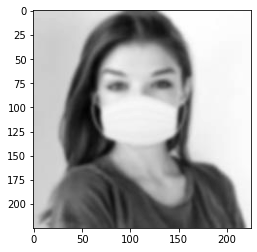

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/content/drive/MyDrive/project images" #your own directory with image files in it
CATEGORIES = ['mask','no mask']

for categories in CATEGORIES:
  path = os.path.join(DATADIR, categories)
  for img in os.listdir(path):
    img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break


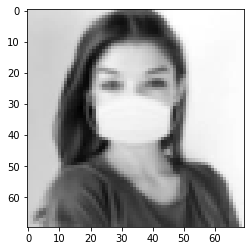

In [8]:
IMG_SIZE=70

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [9]:
training_data= []
def create_training_data():
    for categories in CATEGORIES:
      path = os.path.join(DATADIR, categories)
      class_num = CATEGORIES.index(categories)
      for img in os.listdir(path):
        try:
          img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
          new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass
create_training_data()

In [10]:
print(len(training_data))

1376


In [11]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
  print(sample[1])

0
1
1
0
0
1
1
0
0
0


In [13]:
X=[]
y=[]

In [14]:
for features, label in training_data:
  X.append(features)
  y.append(label)

X =np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [15]:
import pickle

In [16]:
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

import pickle


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
y= np.array(y)
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=6, validation_split=0.1)

Epoch 1/6
39/39 [==============================] - 91s 2s/step - loss: 0.6763 - accuracy: 0.6074 - val_loss: 0.6669 - val_accuracy: 0.5362
Epoch 2/6
39/39 [==============================] - 90s 2s/step - loss: 0.4240 - accuracy: 0.8086 - val_loss: 0.3157 - val_accuracy: 0.8768
Epoch 3/6
39/39 [==============================] - 97s 2s/step - loss: 0.2107 - accuracy: 0.9305 - val_loss: 0.1997 - val_accuracy: 0.9203
Epoch 4/6
39/39 [==============================] - 96s 2s/step - loss: 0.1432 - accuracy: 0.9523 - val_loss: 0.1554 - val_accuracy: 0.9348
Epoch 5/6
39/39 [==============================] - 91s 2s/step - loss: 0.1013 - accuracy: 0.9669 - val_loss: 0.1326 - val_accuracy: 0.9638
Epoch 6/6
39/39 [==============================] - 90s 2s/step - loss: 0.0783 - accuracy: 0.9701 - val_loss: 0.1431 - val_accuracy: 0.9420


In [18]:
model.save('64x3-CNN.model')

INFO:tensorflow:Assets written to: 64x3-CNN.model/assets


[[1.]]
no mask


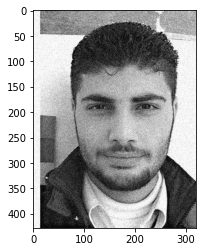

In [42]:
import cv2
import tensorflow as tf

CATEGORIES = ["mask", "no mask"]


def prepare(filepath):
    IMG_SIZE = 70 
    img_array =cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model")
imgg=r'/content/drive/MyDrive/random image/random/augmented_image_175.jpg' #enter path of image you want to check
prediction = model.predict([prepare(imgg)])
print(prediction) 
print(CATEGORIES[int(prediction[0][0])])
img=cv2.imread(imgg,cv2.IMREAD_GRAYSCALE )
plt.imshow(img, cmap='gray')
plt.show()
